### data from https://www.kaggle.com/emurphy/ames-iowa-housing-prices-dataset/version/1?login=true#train1.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = "house_train.csv"
# data = np.loadtxt(filename)
# X = data.T[1:16]
# Y = data.T[17]
# X.shape
df = pd.read_csv(filename)
data = df.values
X = data.T[1:17]
Y = data.T[17]


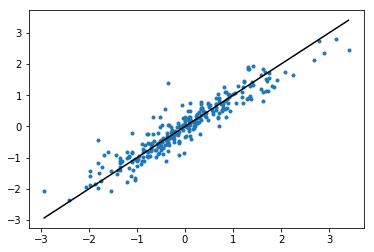

In [116]:
# randomly shuffle the data and split into TRAIN and TEST sets 
Ntrain= 1164
Ntest= 291
N = Ntrain+Ntest
np.random.shuffle(data)
Dx=data.T[1:17]
Dy=data.T[17]
X = Dx.T[0:Ntrain]
X_= Dx.T[Ntrain:N]
Y = np.log(Dy.T[0:Ntrain])
Y_= np.log(Dy.T[Ntrain:N])

# preprocess the data to standardize (remove mean and standardize variance)
from sklearn import preprocessing
X = preprocessing.scale(X)
X_ = preprocessing.scale(X_)
Y = preprocessing.scale(Y)
Y_ = preprocessing.scale(Y_)

# linear fit the data and plot the test y and predicted y
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(X,Y)
Y_pred = linreg.predict(X_)
plt.plot(Y_,Y_pred,'.')
t = np.linspace(np.min(Y_),np.max(Y_),20)
plt.plot([t[0], t[-1]],[t[0], t[-1]],'k-')
plt.show()

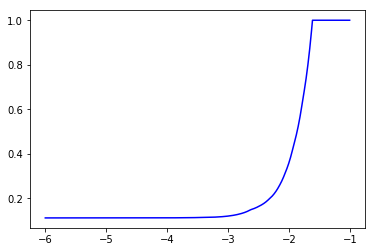

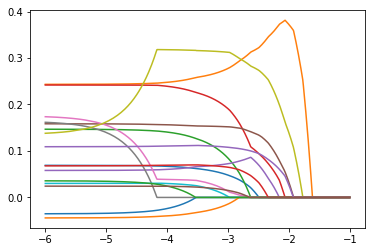

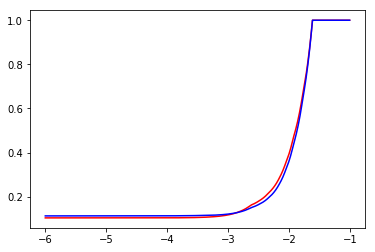

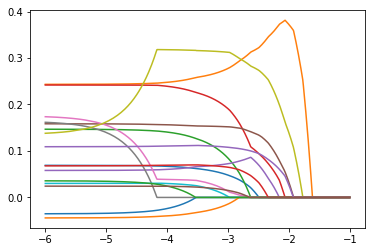

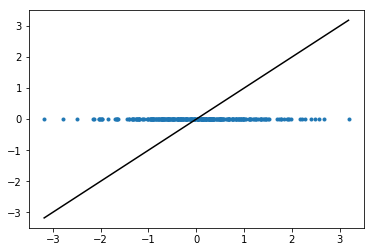

In [26]:
# randomly shuffle the data and split into TRAIN and TEST sets 
Ntrain= 1164
Ntest= 291
N = Ntrain+Ntest
np.random.shuffle(data)
Dx=data.T[1:17]
Dy=data.T[17]
X = Dx.T[0:Ntrain]
X_= Dx.T[Ntrain:N]
Y = np.log(Dy.T[0:Ntrain])
Y_= np.log(Dy.T[Ntrain:N])

# preprocess the data to standardize (remove mean and standardize variance)
from sklearn import preprocessing
X = preprocessing.scale(X)
X_ = preprocessing.scale(X_)
Y = preprocessing.scale(Y) 
Y_ = preprocessing.scale(Y_) 

# run ridge regression
from sklearn.linear_model import Lasso
Ns = 1000
MSE_train = np.zeros(Ns)
MSE_test = np.zeros(Ns)
Intct = np.zeros(Ns)
Coef = np.zeros((Ns,16))
a=0.005
b=6
for i in range(Ns):
    lambd = float(10)**(a*float(i)-b)
    ridgereg = Lasso(alpha=lambd,normalize=True)
    # fit the model for varying lambda
    ridgereg.fit(X,Y)
    # compute the predicted values for both train and test datasets
    Y_pred = ridgereg.predict(X_)
    Ypred  = ridgereg.predict(X)
 
    Intct[i] = ridgereg.intercept_
    Coef[i] = ridgereg.coef_
    MSE_train[i] = 1/float(Ntrain)*(sum((Y-Ypred)**2))
    MSE_test[i] = 1/float(Ntest)*(sum((Y_-Y_pred)**2))

    
# plot training error and the coefficient values 
plt.plot(a*np.arange(Ns)-b,MSE_train,'-b')
plt.show()
plt.plot(a*np.arange(Ns)-b,Coef)
plt.show()

# plot the trianing and test error (for a zommed-in regime) and the coefficient values
I=1000
plt.plot(a*np.arange(I)-b,MSE_test[0:I],'-r')
plt.plot(a*np.arange(I)-b,MSE_train[0:I],'-b')
plt.show()
plt.plot(a*np.arange(I)-b,Coef[0:I])
plt.show()

# plot y vs. prediction
plt.plot(Y_,Y_pred,'.')
t = np.linspace(np.min(Y_),np.max(Y_),20)
plt.plot([t[0], t[-1]],[t[0], t[-1]],'k-')
plt.show()

## feature selection

In [115]:
# generate training data
import numpy as np
N = 30
d = 200
x = np.random.uniform(-1,1,(N,d))
w0 = np.array([[1, 2, -1, 2, -2, 1, 3]])
w0 = np.c_[w0, [np.zeros(d-7)]]
a = np.array([.5*np.random.randn(N)])
y = np.matmul(x,w0.T) + a.T
# generate test data
N_ = 100
x_ = np.random.uniform(-1,1,(N_,d))
a = np.array([.5*np.random.randn(N_)])
y_ = np.matmul(x_,w0.T) + a.T



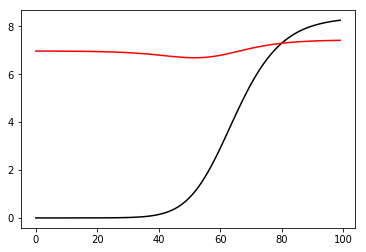

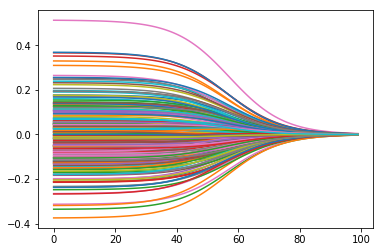

In [131]:
# Ridge regression fit
from sklearn.linear_model import Ridge
Ns=100
Intct=np.zeros(Ns)
Coef=np.zeros((Ns,d))
MSE_train=np.zeros(Ns)
MSE_test=np.zeros(Ns)
for i in range(100):
    lambd =  10**(0.05*i-2)
    ridgereg = Ridge(alpha=lambd,normalize=True)
    # fit the model for varying lambda
    ridgereg.fit(x,y)
    # compute the predicted values for both train and test datasets
    y_pred = ridgereg.predict(x_)
    ypred  = ridgereg.predict(x)

    Intct[i] = ridgereg.intercept_
    Coef[i] = ridgereg.coef_
    MSE_train[i] = 1/float(N)*(sum((y-ypred)**2))
    MSE_test[i] = 1/float(N_)*(sum((y_-y_pred)**2))

plt.plot(np.arange(Ns),MSE_train,'k-')
plt.plot(np.arange(Ns),MSE_test,'r-')
plt.show()
plt.plot(np.arange(Ns),Coef)
plt.show()

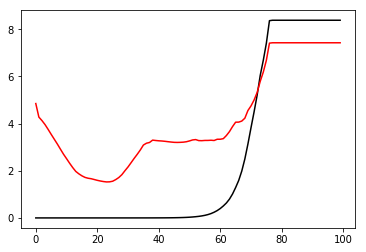

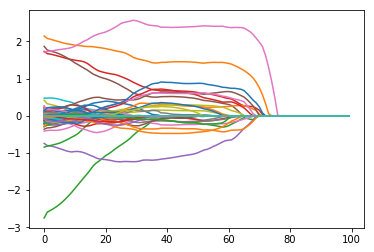

In [133]:
# Lasso regression fit
from sklearn.linear_model import Lasso
Ns=100
Intct=np.zeros(Ns)
Coef=np.zeros((Ns,d))
MSE_train=np.zeros(Ns)
MSE_test=np.zeros(Ns)
for i in range(100):
    lambd =  10**(0.06*i-5)
    lassoreg = Lasso(alpha=lambd,normalize=True)
    # fit the model for varying lambda
    lassoreg.fit(x,y)
    # compute the predicted values for both train and test datasets
    y_pred = lassoreg.predict(x_)
    ypred  = lassoreg.predict(x)

    Intct[i] = lassoreg.intercept_
    Coef[i] = lassoreg.coef_
    MSE_train[i] = 1/float(N)*(sum((y.T[0]-ypred)**2))
    MSE_test[i] = 1/float(N_)*(sum((y_.T[0]-y_pred)**2))

plt.plot(np.arange(Ns),MSE_train,'k-')
plt.plot(np.arange(Ns),MSE_test,'r-')
plt.show()
plt.plot(np.arange(Ns),Coef)
plt.show()